<a href="https://colab.research.google.com/github/fvillena/patrones/blob/main/1-preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocesamiento

El preprocesamiento de datos es la primera etapa a realizar dentro de un proyecto de ciencia de datos y de esta depende la correcta implementación de algoritmos de aprendizaje de máquinas.

In [1]:
import numpy as np # Biblioteca para manejar datos vectoriales
import sklearn.preprocessing # Módulo de preprocesamiento de datos
import pandas as pd # Biblioteca para manejo de datos
import matplotlib.pyplot as plt # Visualización

In [2]:
np.random.seed(11) # Fijamos la semilla del generador de datos al azar para obtener resultados consistentes

Generaremos un conjunto de datos sintético con el cual exploraremos las distintas técnicas de preprocesamiento de datos para aprendizaje de máquinas.

In [3]:
x1 = np.random.normal(loc=100, scale=30, size=10000) # Generamos datos sintéticos utilizando una distribución normal de media loc y desviación estándar scale

In [4]:
x2 = np.random.uniform(low=1000, high=2000, size=10000) # Generamos datos sintéticos utilizando una distribución uniforme entre low y high.

In [5]:
x3 = x2.copy()
x3[np.random.randint(low=0,high=x2.size,size=1000)] = np.random.uniform(low=5, high=6, size=1000) # Generamos un conjunto de datos con outliers desde la variable anterior.

In [6]:
# Generamos una variable que contiene distintos grupos de datos determinados por distintas distribuciones normales.
x4 = np.hstack([
           np.random.normal(loc=1000, scale=300, size=1500),
           np.random.normal(loc=2000, scale=300, size=2000),
           np.random.normal(loc=3000, scale=300, size=3000),
           np.random.normal(loc=4000, scale=300, size=3500),
           ])

In [7]:
x = np.stack([x1,x2,x3,x4],axis=1) # Agrupamos nuestras variables en una matriz bidimensional.

Una de las características que deben tener nuestras variables para una correcta aplicación de ciertos algoritmos de aprendizaje de máquinas es que todas deben estar en el mismo rango. Con la siguiente visualización se puede evaluar que todas las variables cuentan con distintos rangos y distribuciones. Una de las convencionas más utilizadas es escalar todas nuestras variables hacia valores entre 0 y 1 o que se distribuyan con una distribución normal de media 0 y desviación estándar 1.

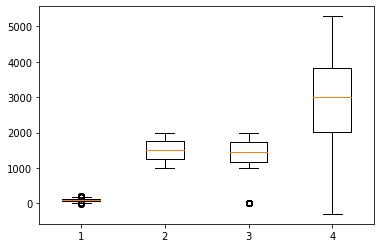

In [8]:
# Visualizamos nuestro conjunto de datos a través de un box plot para evaluar los rangos y distribuciones de nuestras variables.
plt.boxplot(x)
plt.show()

## Actividad 1:
Nuestra primera variable se distribuye de manera normal, pero está desplazada del 0 y además tiene una desviación estándar distinta a 1. Programe una función que escale esta variable a una distribución estándar de media 0 y desviación estándar 1. Este proceso de escalamiento se llama Standard Scaling.

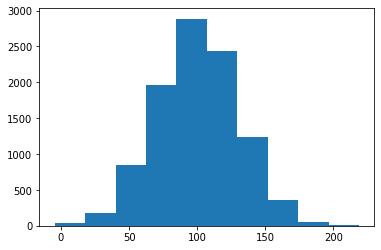

In [9]:
plt.hist(x[:,0])
plt.show()

In [10]:
def standard_scaler(a, low=0, high=1):
  # ¡Prográmame!
  return a

## Actividad 2:
Nuestra segunda variable se distribuye de manera uniforme, pero tiene un rango muy distinto a las demás variables. Programe una función que escale esta variable hacia valores entre 0 y 1, donde el menor valor sea escalado a 0 y el mayor a 1. Este proceso de escalamiento se llama Min-Max Scaling.

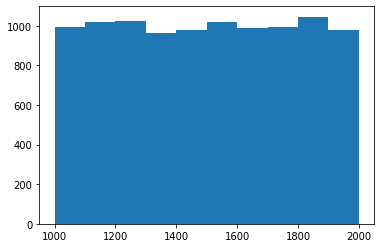

In [11]:
plt.hist(x[:,1])
plt.show()

In [12]:
def min_max_scaler(a, low=0, high=1):
  # ¡Prográmame!
  return a

## Actividad 3:
Es muy frecuente que dentro de nuestros conjuntos de datos encontremos outliers. La variable 3 tiene una distribución uniforme pero cuenta con valores outliers. ¿Cómo se comporta el Min-Max Scaling en este caso?, aplique otro método de escalamiento que sea robusto a outliers.

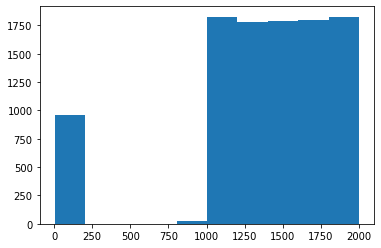

In [13]:
plt.hist(x[:,2])
plt.show()

In [14]:
# HINT: scaler = sklearn.preprocessing.RobustScaler()

## Actividad 4:
Otro método de preprocesamiento que se utiliza en ciencia de datos es la transformación de variables continuas hacia valores discretos. Valore la calidad de la discretización aplicada sobre la cuarta variable y modifique el proceso de discretización para que funcione óptimamente.

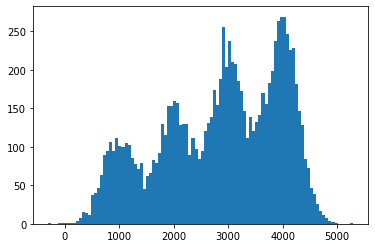

In [15]:
plt.hist(x[:,3], bins=100)
plt.show()

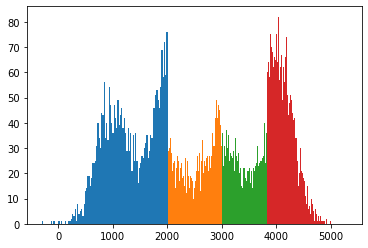

In [16]:
# Modifique este proceso de discretización para que funcione óptimamente.
discretizer = sklearn.preprocessing.KBinsDiscretizer(n_bins=4,encode='ordinal',strategy='quantile')
x4_discrete = discretizer.fit_transform(x[:,3].reshape(-1, 1))
for i in range(4):
  plt.hist(x[(x4_discrete == i).flatten(),3],bins=100)

## Valores de propiedades desde atributos de las casas

Este conjunto de datos relaciona los valores de venta de propiedades con atributos de las mismas. Cada una de las características de las casas tienen una alta diferencia de rango entre si. Evalue el mejor método de escalamiento apra cada variable y aplíquelo.

In [17]:
real_estate = pd.read_csv("https://github.com/fvillena/mlfa/raw/master/data/real_estate.csv", delimiter=";")

In [18]:
real_estate.describe()

,transaction_date,house_age,distance_nearest_station,number_convenience_stores,latitude,longitude,price_unit_area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000
